## Notebook 4A - Wed/Thurs
### Loops and calculating orbits by Euler's method
### Total points: 5
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Unpacking items from a list
Python has a convenient way to separate out lists or tuples into individually-named variables. You will need to use unpacking in Task 3.

In [8]:
# define a list
datelist = ["Monday", 8, 23, 2020]

We can split `datelist` into four separate variables in one line by "unpacking" the list. The length of the list must match the number of variables.

In [19]:
# a successful unpack
day_of_week, month, day, year = datelist  # list of length 4  unpacked into 4 variables

# print the value and the data type for each unpacked value
print(day_of_week, type(day_of_week))
print(month, type(month))
print(day, type(day))
print(year, type(year))

Monday <class 'str'>
8 <class 'int'>
23 <class 'int'>
2020 <class 'int'>


In [20]:
# unpack fails because number of elements didn't match
day_of_week, month, day = datelist

ValueError: too many values to unpack (expected 3)

# Tasks 1-4: Orbits!

# Task 1: Copy your `F_grav_vec()` function and run the test case (1 point)

Copy your working code from labs PS3B and PS4A.  Make sure to use the function that inputs vectors (i.e., numpy arrays) and returns vectors (i.e., numpy arrays).

In [21]:
"""
Define the function F_grav_vec() which can be used to compute the graviational force
pos1, numpy array of positions (x1,y1,z1) in meters
pos2, numpy array of positions (x2,y2,z2) in meters
m1, m2, masses in kg
"""
from scipy.constants import G # import gravitational constant 

### BEGIN SOLUTION
def F_grav_vec(pos1, pos2, m1, m2) :
    r = np.linalg.norm(pos2-pos1)
    F_mag = G*m1*m2/r**2
    r_unit = (pos2-pos1)/r
    F_grav = -F_mag*r_unit
    return F_grav

pos1 = np.array([0,0,0]); pos2 = np.array([1,0,0])
print(F_grav_vec(pos1,pos2, m1=70, m2=100))
print(F_grav_vec(pos1,pos2, m1=100, m2=70)) 
print(F_grav_vec(pos1+4,pos2+4, m1=100, m2=70))
print(F_grav_vec(10*(pos1+4),10*(pos2+4), m1=100, m2=70))  
### END SOLUTION

[-4.67201e-07 -0.00000e+00 -0.00000e+00]
[-4.67201e-07 -0.00000e+00 -0.00000e+00]
[-4.67201e-07 -0.00000e+00 -0.00000e+00]
[-4.67201e-09 -0.00000e+00 -0.00000e+00]


In [23]:
## """Check the F_grav_vec against test cases (same situations as for F_grav1)"""

def vector_error(studentvec, instructorvec) :
    error = np.linalg.norm(studentvec - instructorvec)/np.linalg.norm(instructorvec)
    return error
    

# force between two people should be less than a micronewton.
pos1 = np.array([0,0,0]); pos2 = np.array([1,0,0])
studentresult = F_grav_vec(pos1,pos2, m1=70, m2=100)
assert type(studentresult) == np.ndarray  # check datatype of students' result

instructorresult = np.array( [-4.67201e-07, -0.0, -0.0] )
assert vector_error(studentresult, instructorresult ) < 1e-5

# revese m1 and m2 values
studentresult = F_grav_vec(pos1,pos2, m1=100, m2=70)
instructorresult = [-4.67201e-07, -0.0, -0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

# shift positions of both masses by equal amounts
studentresult = F_grav_vec(pos1+4,pos2+4, m1=100, m2=70)
instructorresult = [-4.67201e-07, -0.0, -0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

# move masses 10x farther apart
studentresult = np.array(F_grav_vec(10*(pos1+4),10*(pos2+4), m1=100, m2=70))
instructorresult = [-4.67201e-09, -0.0, -0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

del vector_error, studentresult, instructorresult

# Task 2: Create the `orbit1()` function to calculate orbits around Earth (1 point)

Start by copying and pasting your code from `trajectory4()` in PS4A, which already uses Newton's Universal Gravitational force and `F_grav_vec()`. 

The ONLY change is **the coordinate system should be the center of earth (rather than surface of earth).**

**Function name:** `orbit1()`

**Inputs:** 
* `pos0`, a numpy array that represent the initial position coordinates $x_0$, $y_0$, $z_0$ of object in meters, relative to the center of the earth
* `vel0`, a numpy array that represent the initial velocity of object in m/s
* `m`, mass of object in kg
* `dt`, time step $\Delta t$
* `tmax`, simulation runs from $t = 0$ to $t = t_{\textrm{max}}$ 

**Outputs:**  
 a list `[t_array, pos_array]` where
 * `t_array` is a numpy array of time values
 * `pos_array` is a 2D numpy array with 3 columns (x,y,z) and N rows for each step in the simulation
 
**Note:** The function `orbit1` should not produce any plots, but we will use the output to produce plots.

In [33]:
"""
Define the orbit1() function. Replace the constant gravitational acceleration with Newton's Universal Gravitation
The object should not bounce.
"""

R_earth = 6.371e6  # Radius of earth in meters
m_earth = 5.972e24 # mass of earth in kg


### BEGIN SOLUTION
def orbit1(pos0, vel0, m, dt, tmax) :

    pos_earth_center = np.array([0,0,0])
       
    pos = pos0 
    vel = vel0
    t = 0 # intitial time

    t_list = []  # makes a empty list to record the times
    pos_list = [] # makes an empty list to record hte position
    
    t_list.append(t)
    pos_list.append(pos)
                   
    while t < tmax:  # run loop for positive heights (y-values), stop when hit ground
        force = F_grav_vec(pos_earth_center, pos, m_earth, m)
        acc = force/m
        #print(acc)
        pos = pos + vel*dt # update position
        vel = vel + acc*dt # update velocity
        t = t + dt  # increment the time
        pos_list.append(pos)  # append a new position to end of position list
        t_list.append(t)  # append a new time to end of time list
    
    pos_array = np.array(pos_list)  # converts a list of position arrays to a 2D numpy array
    t_array = np.array(t_list) # converts a list of times to a 1D array of times
    
    return [t_array, pos_array]

### END SOLUTION

In [34]:
"""
Check the orbit1() function against a test case of 
launch outward from earth's surface (45 N latitude, 0 E longitude)
"""
R_earth = 6.371e6  # Radius of earth in meters

pos0 = R_earth * np.array([0.5**0.5,0.5**0.5,0]); vel0 = 100*np.array([0.5**0.5,0.5**0.5,0])
tmax = 20.45; dt = 0.01; m = 5
t_array, pos_array = orbit1(pos0, vel0, m, dt, tmax)
assert (t_array[-1] - tmax) < dt*2 
assert abs(np.dot(pos_array[0], np.array([0.5**0.5,0.5**0.5,0])) - np.dot(pos_array[-1], np.array([0.5**0.5,0.5**0.5,0]))) < 10 
assert abs(np.dot(pos_array[1023], np.array([0.5**0.5,0.5**0.5,0])) - np.dot(pos_array[-1], np.array([0.5**0.5,0.5**0.5,0])) - 510.2) < 10 

# Task 3: Diagram and parameters for International Space Station (1 point) 
![Image of International Space Station from Wikipedia](640px-International_Space_Station_after_undocking_of_STS-132.jpg)
The [International Space Station (ISS)](https://en.wikipedia.org/wiki/International_Space_Station) is in an approximately circular orbit 404 km above the surface of the earth. In order to simulate 3 orbits of the ISS using the `orbit1()` function, ***what values*** would you give the following quantities and ***why***? 
1. `pos0` the initial vector position
1. `vel0` the initial velocity vector
1. `m` the mass
1. `dt` the time step
1. `tmax` the max time to run the simulation  

Your diagram should include the earth-centered coordinate system and vectors for `pos0` and `vel0`.

[Wikipedia's article on the ISS](https://en.wikipedia.org/wiki/International_Space_Station) offers some helpful parameters. Show your answers to your instructor.

## Creating plots with x- and y-axes on the same scale
For plotting trajectories, it is nice to force the plot aspect ratio to be equal, so the x-scale and y-scale are the same. This keeps circular orbits looking circular. The default is plots that are wider than tall, which will distort a circular orbit to look elliptical.

**Code with default axes, which will not force x and y on the same scale**

    plt.plot(x_array, y_array) # make the plot of y vs x

**Code forcing equal scale on x and y axes**

    fig = plt.figure()  # creates a new figure
    ax = plt.gca()      # gca() gets the current "axes object" which has lots of plot settings
    ax.set_aspect('equal')  # set the aspect ratio for the axes to be equal
    plt.plot(x_array, y_array)  # make the plot of y vs x

# Task 4: Create a plot of a unit circle using equal axes. 
Create a plot of a circle using the polar equations for x and y:
$$x(t) = \cos t$$
$$y(t) = \sin t$$

You must use the equal axes formatting, as shown in the example above. Make sure to name your figure `fig` and your axes `ax` as shown in the example. I will check these variables in the autograder test cases.

Text(0, 0.5, 'y')

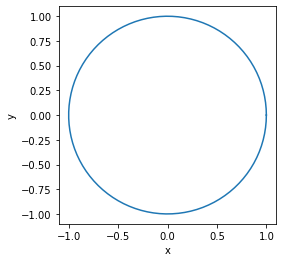

In [36]:
""" Create a plot of a unit circle, using equal axes for the plot """

### BEGIN SOLUTION
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

fig = plt.figure()  # creates a new figure
ax = plt.gca()      # gca() gets the current "axes object" which has lots of plot settings
ax.set_aspect('equal')  # set the aspect ratio for the axes to be equal
plt.plot(x, y)  # make the plot of y vs x
plt.xlabel("x")
plt.ylabel("y")
### END SOLUTION

In [39]:
""" 
Check the unit circle plot 
MAKE SURE IT LOOKS LIKE A CIRCLE!
"""

assert ax.get_aspect() == 1.0 # check for equal axes
xmin, xmax = ax.get_xlim()  
assert xmin <= -1 and xmax >= 1  # check the x limits are reasonable
ymin, ymax = ax.get_ylim()
assert ymin <= -1 and ymax >= 1  # check the y limits are reasonable

# Task 5 : Using the values you justified above calculate approximately 3 ISS orbits around the Earth (1 point)

Using the values you justified above calculate approximately 3 ISS orbits around the Earth. Save your calculations in variables labeled 
* `t_array_ISS` 
* `pos_array_ISS`

You must use the equal axes formatting, as shown in the example above.


3.820241545327008e-08
0.001881776433524201
0.001245380941202227


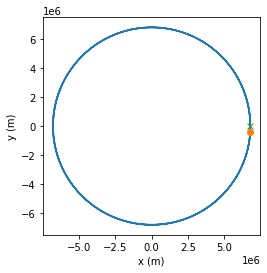

In [40]:
"""
Use the orbit1() function to Calculate the time and position arrays 
t_array_ISS and pos_array_ISS for 3 orbits of the space station.
Use your parameters from the previous task and define each on a separate line of code.
"""

R_earth = 6.371e6  # Radius of earth in meters

### BEGIN SOLUTION

ISS_height = 404e3 # height of ISS orbit above the earth's surface in meters
ISS_mass = 419725 # mass in kg 
ISS_speed = 7.67e3  # orbital speed in m/s
pos0 = np.array([R_earth + ISS_height, 0, 0])  # starts on the x-axis
vel0 = np.array([0,ISS_speed,0]) # starts moving in the +y direction
tmax = 3.00 * 92.5 * 60  # 10 orbits, 92.5 min per orbit, 60 seconds per min
#dt = 92.5 * 60 / 100000  # divide orbital time in seconds by number of steps per orbit
dt = .1

t_array_ISS, pos_array_ISS = orbit1(pos0, vel0, ISS_mass, dt, tmax)
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')
plt.plot(pos_array_ISS[::,0], pos_array_ISS[::,1], '-')
plt.plot(pos_array_ISS[-1,0], pos_array_ISS[-1,1], 'o')
plt.plot(pos_array_ISS[0,0], pos_array_ISS[0,1], 'x')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

print( abs( (t_array_ISS[-1] - t_array_ISS[0]) - 92.5*3*60) )  # 3 orbits +- 5 minutes
print( abs( np.mean(np.linalg.norm(pos_array_ISS, axis=1)) - 6776271 )/ 6776271 ) # 5% consistency in orbital radius
print( abs( np.mean(pos_array_ISS) )/6776271 )

### END SOLUTION

#### Check your orbital calculations against this plot and the test cases below
You should produce a plot something similar to 
![ISS Orbit](ISS_orbit.png)
The start and end positions of the orbit should be very close, because we calculated 3 full orbits. If you notice a gap between the start and end positions try decreasing the time step $dt$, which will increase the accuracy.

In [41]:
""" check the values of the pos_array_ISS and t_array_ISS """

assert abs( (t_array_ISS[-1] - t_array_ISS[0]) - 92.5*3*60) < 300  # 3 orbits +- 5 minutes
assert abs( np.mean(np.linalg.norm(pos_array_ISS, axis=1)) - 6776271 )/ 6776271 < 0.05 # 5% consistency in orbital radius
assert abs( np.mean(pos_array_ISS) )/6776271 < 0.05  # center of orbit should be (0,0,0) allow for 5% error

# `for` loop examples


1. `for` loops require some iterable object such as a list or a numpy array.  
1. The `for` loop then cycles over each element in that list or numpy array.

There are a few ways to create iterable objects:
* `range(stop)` (an iterable object of integers that starts at 0 and goes to `stop-1`)
* `range(start, stop)` (an iterable object of integers that starts at `start` and goes to `stop-1`)
* use a numpy array created by `np.linspace(start, stop, n)`
* use a numpy array created by `np.arange(start, stop, step)`  See [numpy.arange() documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

In [42]:
# using range(stop) as the iteratble object
for i in range(5) :
    print(i)

0
1
2
3
4


#### using np.arange(start, stop,step) to create an iteratable object

In [43]:
theta = np.arange(0, 1, 0.1)  # go from 0 to 1 (excluding 1) in steps of 0.1
print(theta)

for angle in theta :
    print(angle)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


#### using np.linspace(start, stop, num) to create an iteratable object

In [44]:
theta = np.linspace(0,1,11)  # go from 0 to 1 in 11 steps
print(theta)

for angle in theta :
    print(angle)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


# Task 6 : Modify your solution from Task 5 to see the effect of varying the initial speed of the ISS. (Ungraded, time permitting)
Either increasing or decreasing the initial speed will modify the orbit from circular to elliptical. 

**Suggestions** Use a `for` loop to try out a range of initial speeds. I produced a graph similar to this, where the velocity is calculated as a multiple of $v_\textrm{circ}$, the orbital speed in a circular orbit.
![Elliptical orbits](elliptical_orbits.png)

[0.7 0.8 0.9 1.  1.1 1.2 1.3]


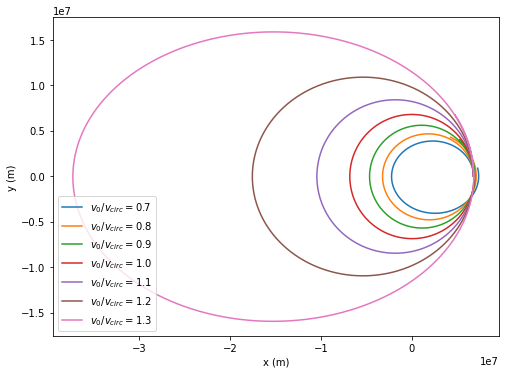

In [32]:
""" A series of elliptical orbits produced by varying the initial speed of the ISS
Minimum value was 0.7 of actual speed. Maximum value was 1.3 of actual speed."""

### BEGIN SOLUTION

R_earth = 6.371e6  # Radius of earth in meters
ISS_height = 404e3 # height of ISS orbit above the earth's surface in meters
ISS_mass = 419725 # mass in kg 
ISS_speed = 7.67e3  # orbital speed in m/s
pos0 = np.array([R_earth + ISS_height, 0, 0])  # starts on the x-axis
vel0 = np.array([0,ISS_speed,0]) # starts moving in the +y direction
tmax = 1 * 92.5 * 60  # 10 orbits, 92.5 min per orbit, 60 seconds per min
dt = 92.5 * 60 / 5000  # 1000 steps per orbit


velscale = np.arange(0.7, 1.31, 0.1)
tscale = [0.6,0.8,0.9,1,1.4,2.4,6]

print(velscale)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.set_aspect('equal')

for i in range(0,len(velscale)) :
    t_array, pos_array = orbit1(pos0, velscale[i] * vel0, m, dt, tmax*tscale[i])
    plt.plot(pos_array[:,0], pos_array[:,1], label="$v_0/v_{circ} = $" + "{0:.1f}".format(velscale[i]))
plt.legend(loc='lower left')
plt.xlabel("x (m)")
plt.ylabel("y (m)")

plt.savefig("elliptical_orbits.png")

### END SOLUTION